# Housing data analysis


In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Machine_Learning_Self

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Machine_Learning_Self


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("housing.csv")

In [4]:
# show first 10 data in data list
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [5]:
# show last 10 data in data list
df.tail(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20630,-121.32,39.29,11.0,2640.0,505.0,1257.0,445.0,3.5673,112000.0,INLAND
20631,-121.40,39.33,15.0,2655.0,493.0,1200.0,432.0,3.5179,107200.0,INLAND
20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND
20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,INLAND
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe468336850>,
      dtype=object)

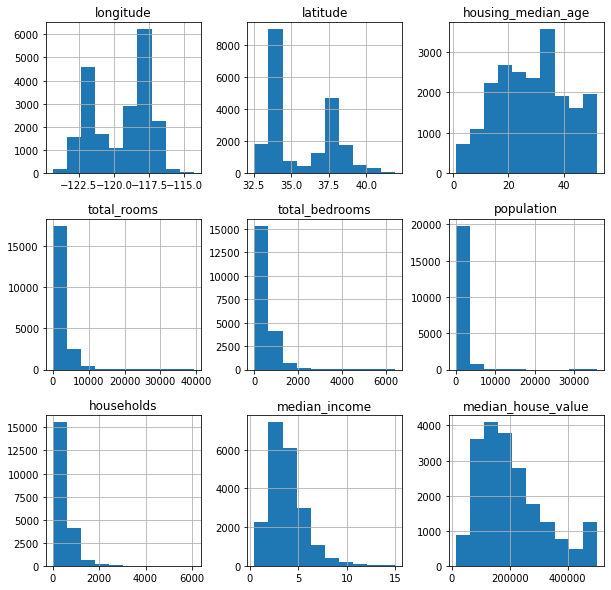

In [7]:
# A histogram is a representation of the distribution of data
df.hist(figsize=(10,10))

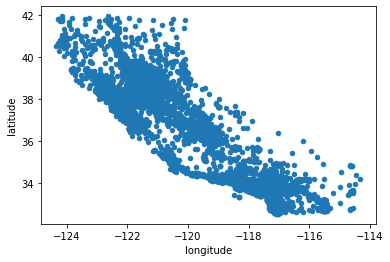

In [12]:
df.plot(kind="scatter",x="longitude",y="latitude")

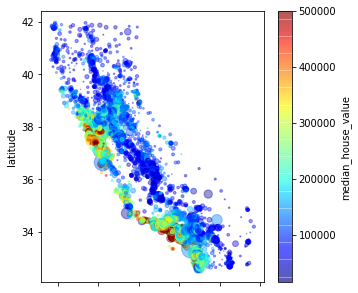

In [14]:
df.plot(kind="scatter",x="longitude",y="latitude",
        s=df["population"]/100,c="median_house_value",
        alpha=0.4,colorbar=True,cmap=plt.get_cmap("jet"),figsize=(5,5))

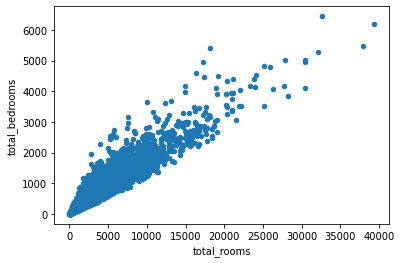

In [11]:
df.plot(kind="scatter",x="total_rooms",y="total_bedrooms")

In [15]:
# Compute pairwise correlation of feature
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [16]:
# compare other feature correlation with median_house_value
df.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [17]:
# mean = the average
# std = standard deviation
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [20]:
# append some new feature in the data list
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["populoation_per_households"] = df["population"]/df["households"]
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,populoation_per_households
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [21]:
df.corr()["median_house_value"].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.688075
rooms_per_household           0.151948
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049686
populoation_per_households   -0.023737
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
bedrooms_per_room            -0.255880
Name: median_house_value, dtype: float64

In [24]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
# show the position of each type data in data list
print(encoder.fit_transform(df["ocean_proximity"]))
# show the unique type of data in feature ocena_proximity
print(encoder.classes_)


[3 3 3 ... 1 1 1]
['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity             20640 non-null  object 
 10  rooms_per_household         20640 non-null  float64
 11  bedrooms_per_room           20433 non-null  float64
 12  populoation_per_households  20640 non-null  float64
dtypes: float64(12), object(1)
memor

In [27]:
# repalce na/nan value by mean value
df["total_bedrooms"].fillna(np.mean(df["total_bedrooms"]),inplace=True)
df["bedrooms_per_room"].fillna(np.mean(df["bedrooms_per_room"]),inplace=True)

In [28]:
df.drop(columns=["ocean_proximity","bedrooms_per_room","total_bedrooms"],inplace=True)
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,rooms_per_household,populoation_per_households
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,8.288136,2.802260
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,5.817352,2.547945
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,6.281853,2.181467
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,4.761658,2.139896
6,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,4.931907,2.128405
7,-122.25,37.84,52.0,3104.0,1157.0,647.0,3.1200,241400.0,4.797527,1.788253
8,-122.26,37.84,42.0,2555.0,1206.0,595.0,2.0804,226700.0,4.294118,2.026891
9,-122.25,37.84,52.0,3549.0,1551.0,714.0,3.6912,261100.0,4.970588,2.172269


In [34]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(df,test_size=0.2,random_state=42)

train_set.reset_index(inplace=True,drop=True)
test_set.reset_index(inplace=True,drop=True)

In [41]:
print("train_set data size: ", train_set.shape)
print("test_set data size:", test_set.shape)

train_set data size:  (16512, 10)
test_set data size: (4128, 10)


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Use median_house_value is label data
train_house_labels = train_set["median_house_value"].copy()
test_house_labels = test_set["median_house_value"].copy()

# Drop or delete median_house_value in to data feature
train_set.drop(columns=["median_house_value"],inplace=True)
test_set.drop(columns=["median_house_value"],inplace=True)

train_cols = train_set.columns

test_cols = test_set.columns

KeyError: ignored

In [51]:
# scale data into same range 
train_house_scaled = pd.DataFrame(scaler.fit_transform(train_set))
test_house_scaled = pd.DataFrame(scaler.transform(test_set))

In [52]:
# add feature name to data
train_house_scaled.columns = train_cols
test_house_scaled.columns = test_cols

# create new scaled data with label
train_house_scaled = train_house_scaled.assign(median_house_value=train_house_labels)
test_house_scaled = test_house_scaled.assign(median_house_value=test_house_labels)

In [53]:
train_house_scaled

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,rooms_per_household,populoation_per_households,median_house_value
0,1.272587,-1.372811,0.348490,0.222569,0.768276,0.322906,-0.326196,-0.174916,0.051376,103000.0
1,0.709162,-0.876696,1.618118,0.340293,-0.098901,0.672027,-0.035843,-0.402835,-0.117362,382100.0
2,-0.447603,-0.460146,-1.952710,-0.342597,-0.449818,-0.430461,0.144701,0.088216,-0.032280,172600.0
3,1.232698,-1.382172,0.586545,-0.561490,-0.007434,-0.380587,-1.017864,-0.600015,0.077507,93400.0
4,-0.108551,0.532084,1.142008,-0.119565,-0.485877,-0.314962,-0.171488,0.349007,-0.068832,96500.0
...,...,...,...,...,...,...,...,...,...,...
16507,0.808883,-0.872016,0.507194,-0.603337,-0.675847,-0.742833,1.307215,0.290620,-0.005588,229200.0
16508,1.073144,-0.759688,0.348490,0.203255,0.287195,-0.133839,-0.436266,0.600411,0.069722,97800.0
16509,0.599469,-0.755007,0.586545,-0.248786,0.289833,0.070909,-0.496973,-0.606759,0.020306,222100.0
16510,-1.185540,0.906510,-1.079841,0.429046,0.308303,0.154908,0.965450,0.402175,0.007076,283500.0


In [54]:
test_house_scaled

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,rooms_per_household,populoation_per_households,median_house_value
0,0.285347,0.195100,-0.286324,-0.522862,-0.030301,-0.370087,-1.155085,-0.520686,0.067408,47700.0
1,0.060975,-0.235491,0.110435,0.138415,0.121851,0.220532,-0.708659,-0.165815,-0.036030,45800.0
2,-1.424870,1.009478,1.856173,0.546310,-0.102419,1.215396,-0.210402,-0.610765,-0.149989,500001.0
3,0.429943,-0.637999,-0.921138,0.188080,0.244979,-0.013091,0.975113,0.305115,0.030011,218600.0
4,-1.170581,0.457199,0.427842,-0.133821,-0.319653,-0.188964,-0.081794,0.024193,-0.052971,278000.0
...,...,...,...,...,...,...,...,...,...,...
4123,1.177851,-1.068590,-1.000489,0.240504,-0.066360,-0.125964,0.380334,0.656380,-0.009330,263300.0
4124,-0.622115,-0.132523,-0.048268,0.773020,0.196607,0.538154,-0.606098,0.291827,-0.065340,266800.0
4125,-1.230414,0.780141,-0.286324,0.675530,0.139441,0.178532,2.809024,0.755012,-0.026469,500001.0
4126,-0.088607,0.527404,0.586545,-0.062083,-0.175417,-0.068215,-0.575430,-0.061243,-0.043905,72300.0


In [55]:
from sklearn.linear_model import LinearRegression

X_train = np.array(train_house_scaled.drop(columns=["median_house_value"]))
y_train = np.array(train_house_scaled["median_house_value"])

X_test = np.array(test_house_scaled.drop(columns=["median_house_value"]))
y_test = np.array(test_house_scaled["median_house_value"])

In [56]:
# divided train data set in to 2 part use to train and test 
X_train,X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.15,random_state=42)

In [57]:
def plot_learning_curves(model,X_train,y_train,X_val,y_val):
  train_errors = []
  val_errors = []
  for m in range(1,len(X_train)):
    tmp_X_train = X_train[:m]
    tmp_y_train = y_train[:m]
    model.fit(tmp_X_train, tmp_y_train)
    y_train_pred = model.predict(tmp_X_train)
    y_val_pred = model.predict(X_val)
    train_error = mean_squared_error(tmp_y_train, y_train_pred)
    val_error = mean_squared_error(y_val,y_val_pred)
    train_errors.append(train_error)
    val_errors.append(val_error)
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
  plt.xlabel("Training set size", fontsize=14)
  plt.ylabel("RMSE", fontsize=14)
  plt.legend(loc = "best")
  plt.axis([0, len(X_train), 0, 300000])
  plt.show()

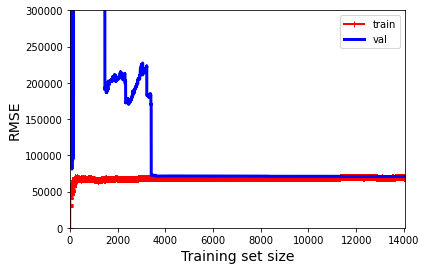

In [58]:
lin_reg = LinearRegression()

plot_learning_curves(lin_reg,X_train,y_train,X_val,y_val)

In [59]:
lin_reg = LinearRegression()

lin_reg.fit(X_train,y_train)

LinearRegression()

In [60]:
lin_reg.score(X_train,y_train)

0.6380195975311883

In [61]:
lin_reg.score(X_test,y_test)

0.6208801263249423

In [62]:
mse = mean_squared_error(y_test,lin_reg.predict(X_test))
rmse = np.sqrt(mse)

print("RMSE: ", rmse)

RMSE:  70484.18874423904
